# Sentimental Analysis
* If new data text has words not seen before training, what should I do? (Ignore those words? Or something else?)

In [5]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from langdetect import detect_langs

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, train_test_split

import re

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
two_cities = 'It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.'
catcher = "If you really want to hear about it,the first thing you'll probably want to know is where I was born, and what my lousy childhood was like, and how my parents were occupied and all before they had me, and all that David Copperfield kind of crap, but I don't feel like going into it, if you want to know the truth."
annak = 'Happy families are all alike; every unhappy family is unhappy in its own way'
east_of_eden = 'I remember my childhood names for grasses and secret flowers. I remember where a toad may live and what time the birds awaken in the summer—and what trees and seasons smelled like—how people looked and walked and smelled even. The memory of odors is very rich.'
illuminated = 'I am not sad, he would repeat to himself over and over, I am not sad. As if he might one day convince himself or convince others -- the only thing worse than being sad is for others to know that you are sad. I am not sad.'

# labelled positive
titanic = "Titanic directed by James Cameron presents a fictional love story on the historical setting of the Titanic. The plot is simple, noncomplicated, or not for those who love plots that twist and turn and keep you in suspense. The end of the movie can be figured out within minutes of the start of the film, but the love story is an interesting one, however. Kate Winslett is wonderful as Rose, an aristocratic young lady betrothed by Cal (Billy Zane). Early on the voyage Rose meets Jack (Leonardo DiCaprio), a lower class artist on his way to America after winning his ticket aboard Titanic in a poker game. If he wants something, he goes and gets it unlike the upper class who are so concerned with their social worries. The two fall in love and the audience sees the sinking of the Titanic primarily through their eyes.<br /><br />The movie begins in modern times with the exploration of the wreck by a group searching for treasures, that sunk with the Titanic, which has recently occurred. One of the survivors of the Titanic, Rose DeWitt Bukater, who had heard of the exploration of the wreck on television and is flown to the boat where the search is being led from to tell of what she remembers to help the search. She gets to telling her memory of the one and only voyage of the Titanic. With this, the scene shifts to Southhampton, Ireland where the Titanic set sail from on April 10, 1912 as all the passengers are boarding. After another stop on the Irish coast Titanic went out to see on its maiden voyage across the Atlantic bound for New York. Historically the first few days of the voyage went by uneventful, but the fictional plot of the story is developed during this time as Rose sees the hopeless entrapement of an engagement that she is in to the wealthy Cal Hockley and falls in love with third class passenger, Jack Dawson. Captain Smith alledgedly as shown in the movie was urged by the White Star Line Director to increase the speed of the ship so they would make the newspaper headlines and receive extra publicity by arriving in New York on Thursday night and not on Friday morning as planned. Smith then ordered the fateful decision going against his thirty-two years of experience to stretch the Titanic's legs out to full speed. The Titanic had reports that the waters in the Atlantic they were sailing in were full of icebergs, but they ignored these warnings and proceeded at full speed as shown in the movie. On April 15, 1912 at 11:39, an iceberg was sighted. They attempted to shut off the engines and turn the ship out of the path of the iceberg but there was not enough time and the ship hit the iceberg on the starboard side as depicted in the film. The portrayal of the many small holes in the side of the ship and not one large gash along the side is accurate. The crew of Titanic sent out distress calls and set off distress rockets as shown until 2:18 when the lights finally failed. The lights of the California were spotted six miles away but they failed to realize what was going on and did not respond to Titanic's many pleas for help. The California had tried earlier in the day to warn Titanic of the severe ice that had caused them to stop their trip but Titanic had brushed them off causing the California to turn off its radio and leave the Titanic on its own. The first class women and children were the first as depicted to be put into the twenty lifeboats that were on the ship. Overwhelmingly the third class passengers suffered the most amount of deaths of any class and the crew was hit hard in this tragedy too. The word of White Star Line employees and first class passengers was believed over that of second and third class passengers when authorities were trying to gain information of the sinking. Also, the metal that was used to build the Titanic has been found in recent years under conditions of severe cold, which were experienced the night Titanic sank to be extremely brittle. Overall, the basic plot is very accurate in its portayal of the events and the times at which these events took place on the Titanic.<br /><br />Many of the characters in the story were not real and created simply for the purpose of the movie or as composite characters to represent possible characteristics and ideas of people on the ship. The core group of Rose, Jack, Cal, and Rose's mother all were fictional characters added into the story as they represent different groups of people from the time. Yet many characters such as the Unsinkable Molly Brown; Captain Edward Smith; the ship designer, Thomas Andrew; the White Star Line Representative, Bruce Ismay; and all of the Titanic's officers were real. The maiden voyage was going to be Captain Edward Smith's last voyage anyway as he planned to retire afterwards. He had been a part of the White Star Line since 1880 where he worked his way up to his status as the Millionaire's Captain when the Titanic sunk. The portrayals of the officers is accurate as only four survived the tragedy except for the officer who threatened to kill all of the passengers of the ship with his pistol. He is on record as acting heroicly and was misportrayed to the point that James Cameron apologized and evoked a monument in his honor in the officer's former Canadian hometown. As shown in the movie there was a language problem between the crew and many of the lower-class passengers from non-English speaking nations. In addition, Officer Lowe was the only officer who came back in the lifeboat as depicted. The old people shown in their bed as the water came in their room were based on the Strauss'. Not wanting to leave her husband's side Mrs. Strauss refused to get in her lifeboat and died with her husband on the Titanic. Furthermore, Mr. Goggenheim who was shown sipping his brandy and smoking a cigar reportedly did go out like this dressed in his best. The richest man on the ship, John Jacob Astor, who owned most of Manhattan died nonetheless as well, but his much younger wife was saved in a lifeboat. In addition, Molly Brown was saved and later had medals made up for the crew of the Carpethia that picked the survivors of Titanic up from the water. Her ticket on the Titanic had cost over four-thousand dollars and by the end of her life she ended up broke. All of the interiors of the ship were masterfully replacated down to the last pieces of china and silverware. The gymnasium, which is hardly seen is recreated perfectly with all of the machines reproduced to match those seen in old photographs. The wonderful outfits and costuming were an excellent re-creation of the Post-Victorian era of 1912. The rich at this time practically ruled everything, as the women's suffrage movement had not quite gotten moving yet. Women during this time often married for financial security as Rose was considering doing and normally took a back seast status to their husbands as Cal wished for Rose to do. The rich did not take well to `new money' such as Molly Brown as depicted. Everything of the time was very formal. Women had to be escorted to dinner by a male figure as seen with in the dining scenes. Smoking was not very common among women of the time but holders of cigarettes, which were just coming in at the time were used as seen with Rose in the movie. Men of the time generally smoked cigars not cigarettes. Women were constained physically by their corsets and socially by society. Although James Cameron had no background in historical films he brought in experts of Titanic coupled with two years spent cross-referencing the history of the Titanic and few liberties were taken. The beautiful cinematography and special effects also helped to make the film even more breathtaking.<br /><br />A recognizable message can be seen in the movie Titanic as the people on the ship had about three hours to contemplate their demise. The director, James Cameron, shows the various reactions to this time of crisis in people's lives. Everyone reacts differently and he gets you to think of how you might have reacted had you been in that situation on the Titanic on that fateful night. In addition, this film is a reflection of the 1990's when it was produced as it gives a look into the wreck of the Titanic. Only in the past fifteen years has the site of the actual Titanic been found and explored. This movie was able to give us a deeper look into a disaster that many would not have viewed. However, the moral question of whether people today should be taking treasures from the wreck of an underwater graveyard is posed. There have been attempts to stop treasure seeking missions such as the one portrayed in Titanic but all have failed. As it stands today anyone can make a voyage to the Titanic and take whatever valuables they as portrayed in the film showing the general values of our time on this matter.<br /><br />Technically the film is very well done. To get footage of the wreck at the bottom of the ocean it took twelve dives to get all of the footage needed for the movie. In addition, a special camera had to be created to withstand the intense pressure at the bottom of the ocean. Cameron did not plan on using the probe to go as far inside Titanic as anyone has in the 88 years since the ship sunk but it worked out that this provided an unique perspective into the ship. Furthermore, throughout the film fade ins and outs from the wreck of Titanic to the scene of Titanic during its actual voyage. This shift between the modern scene to the past scene during the voyage works as an excellent transition that makes the story easy to follow in aclear manner. At the very beginning of the movie a septune recreation is used to recreate the scene when the actual people left the European coast on Titanic giving it distinction from the rest of the events of the film.<br /><br />Titanic plays almost like a historical biography and is like a work of art, a true epic. Like most history novels, we know the ending, but it doesn't take away from the wonderful treats that can be found in this picture. Certain aspects of this film are Academy Award material including costuming, sound, cintematography, and editing. If you like interesting characters that will give you an insight into the life of characters in the early 1900's and how they face disaster, then this movie definitely is for you.<br /><br />"


In [25]:
blob = TextBlob(titanic)
blob.sentiment

Sentiment(polarity=0.2024748060772906, subjectivity=0.4518248900857597)

In [26]:
cloud_east_of_eden = WordCloud(background_color='white').generate(east_of_eden)

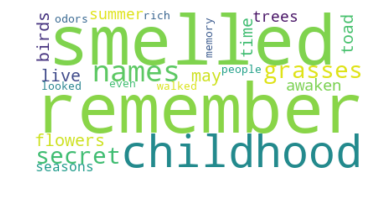

In [27]:
plt.imshow(cloud_east_of_eden, interpolation='bilinear')

plt.axis('off')
plt.show()

In [28]:
east_of_eden

'I remember my childhood names for grasses and secret flowers. I remember where a toad may live and what time the birds awaken in the summer—and what trees and seasons smelled like—how people looked and walked and smelled even. The memory of odors is very rich.'

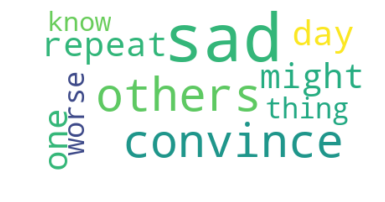

In [33]:
cloud_illuminated = WordCloud(background_color='white').generate(illuminated)

plt.imshow(cloud_illuminated, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
illuminated

'I am not sad, he would repeat to himself over and over, I am not sad. As if he might one day convince himself or convince others -- the only thing worse than being sad is for others to know that you are sad. I am not sad.'

## BOW

In [3]:
annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

In [5]:
anna_vect = CountVectorizer(max_features=1000)

In [10]:
x = anna_vect.fit_transform(annak)
x

<2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [11]:
arr = x.toarray()
arr

array([[1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1]], dtype=int64)

In [14]:
pd.DataFrame(arr, columns=anna_vect.get_feature_names())

,alike,all,are,every,families,family,happy,in,is,its,own,unhappy,way
0,1,1,1,0,1,0,1,0,0,0,0,0,0
1,0,0,0,1,0,1,0,1,1,1,1,2,1


### Amazon Reviews

In [2]:
reviews = pd.read_csv('~/Documents/datasets/0-5mb/amazonearphonesreviews/AllProductReviews.csv')
reviews.head()c

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [17]:
vect = CountVectorizer(max_features=1000)

In [19]:
x = vect.fit_transform(reviews['ReviewBody'][:1000])

In [23]:
bow = pd.DataFrame(x.toarray(), columns=vect.get_feature_names())
bow.head()

,10,100,1000,1099,10m,12,1499,15,1500,1k,...,write,writing,wrong,year,years,yes,yesterday,yet,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## n-grams

In [11]:
def show_n_grams(n, text):
    vect = CountVectorizer(ngram_range=(1,n))
    z = vect.fit_transform(text)
    df = pd.DataFrame(z.toarray(), columns=vect.get_feature_names())
    print(df)

In [14]:
show_n_grams(2, ['The weather is good today'])

   good  good today  is  is good  the  the weather  today  weather  weather is
0     1           1   1        1    1            1      1        1           1


#### n-gram range

In [33]:
vect = CountVectorizer(ngram_range=(1, 2))

In [34]:
x_review = vect.fit_transform(reviews['ReviewBody'][:1000])

In [35]:
x_df = pd.DataFrame(x_review.toarray(), columns=vect.get_feature_names())
x_df.head()

,00,00 30,000,000 while,001,001 battery,03,03 12,04,04 45,...,yup,yup it,zenfone,zenfone mi,zero,zero as,zero one,zero the,zipped,zipped pocket
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### max freq allowed in all documents

In [27]:
vect = CountVectorizer(max_df=200)

In [28]:
x_review = vect.fit_transform(reviews['ReviewBody'][:1000])

In [29]:
x_df = pd.DataFrame(x_review.toarray(), columns=vect.get_feature_names())
x_df.head()

,00,000,001,03,04,10,100,1000,1000inr,1000rs,...,your,yours,yourself,youtube,yr,yrs,yup,zenfone,zero,zipped
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### min freq allowed in all documents

In [36]:
vect = CountVectorizer(min_df=50)

In [37]:
x_review = vect.fit_transform(reviews['ReviewBody'][:1000])

In [38]:
x_df = pd.DataFrame(x_review.toarray(), columns=vect.get_feature_names())
x_df.head()

,999,about,after,all,also,am,amazon,an,and,any,...,will,wire,wireless,with,working,works,worth,would,you,your
0,0,1,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,2,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
vect = CountVectorizer(max_features=1000, ngram_range=(2,2), max_df=500)
x_review = vect.fit_transform(reviews['ReviewBody'][:1000])
x_df = pd.DataFrame(x_review.toarray(), columns=vect.get_feature_names())
x_df.head()

,10 days,15 days,20 days,able to,about the,about this,above average,after month,after months,after one,...,you need,you re,you should,you to,you want,you will,your ear,your ears,your neck,your phone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
for i in range(10):
    for x in x_df.columns[np.random.randint(200,500,3)]:
        print(x)

days of
is best
left side
have not
it so
it better
is amazing
doesn work
for few
it good
is so
hours and
ear bud
its very
is high
is so
is no
it gets
great bass
for listening
is an
end earphones
end earphones
issue with
had to
it for
has stopped
if they
feels like
is getting



## Enriching with new features

In [47]:
word_tokenize("This is awesome! Josh, let's take the win.")

['This',
 'is',
 'awesome',
 '!',
 'Josh',
 ',',
 'let',
 "'s",
 'take',
 'the',
 'win',
 '.']

In [50]:
print([word_tokenize(review) for review in reviews['ReviewBody'][:5]])

[['No', 'doubt', 'it', 'has', 'a', 'great', 'bass', 'and', 'to', 'a', 'great', 'extent', 'noise', 'cancellation', 'and', 'decent', 'sound', 'clarity', 'and', 'mindblowing', 'battery', 'but', 'the', 'following', 'dissapointed', 'me', 'though', 'i', 'tried', 'a', 'lot', 'to', 'adjust.1.Bluetooth', 'range', 'not', 'more', 'than', '10m2', '.', 'Pain', 'in', 'ear', 'due', 'the', 'conical', 'buds', '(', 'can', 'be', 'removed', ')', '3', '.', 'Wires', 'are', 'a', 'bit', 'long', 'which', 'makes', 'it', 'odd', 'in', 'front.4', '.', 'No', 'pouch', 'provided.5', '.', 'Worst', 'part', 'is', 'very', 'low', 'quality', 'and', 'distoring', 'mic', '.', 'Other', 'person', 'keeps', 'complaining', 'about', 'my', 'voice', '.'], ['This', 'earphones', 'are', 'unreliable', ',', 'i', 'bought', 'it', 'before', '15', 'days', 'meanwhile', 'right', 'side', 'ear', 'buds', 'got', 'cracked', 'automatically', 'and', 'it', 'got', 'divided', 'in', 'two', 'parts', ',', 'and', 'sound', 'quality', 'is', 'also', 'not', 'tha

## Other Languages

In [3]:
foreign = 'Este libro ha sido uno de los mejores libros que he leido.'
common = 'The eggs are boiling in water.'

In [4]:
detect_langs(foreign)

[es:0.9999969687510617]

In [10]:
detect_langs(common)

[en:0.9999957286361936]

In [13]:
df = reviews.iloc[:1000, :].copy()

In [15]:
df.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [29]:
languages = []
for review in df['ReviewBody']:
    lang_list = detect_langs(review)
    lang = str(lang_list[0]).split(':')[0]
    languages.append(lang)

In [32]:
df['language'] = languages

In [33]:
df.head()

,ReviewTitle,ReviewBody,ReviewStar,Product,language
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255,en
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255,en
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255,en
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255,en
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255,en


# Stopwords, Stemming, Lemming and TF-IDF

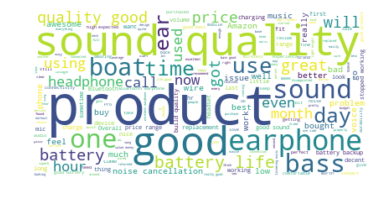

In [40]:
my_cloud = WordCloud(background_color='white').generate(' '.join(list(df['ReviewBody'])))

plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

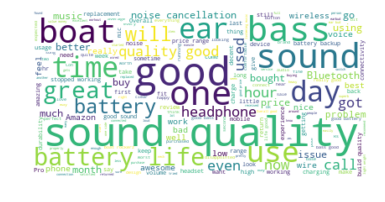

In [42]:
m_stopwords = STOPWORDS.update(['earphone', 'earphones', 'product', 'products'])

my_cloud = WordCloud(background_color='white', stopwords=m_stopwords).generate(' '.join(list(df['ReviewBody'])))

plt.imshow(my_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [45]:
m_stopwords = ENGLISH_STOP_WORDS.union(['earphone', 'earphones', 'product', 'products'])

vect = CountVectorizer(stop_words=m_stopwords)
x = vect.fit_transform(df['ReviewBody'])

stopwords_df = pd.DataFrame(x.toarray(), columns=vect.get_feature_names())
stopwords_df.head()

,00,000,001,03,04,10,100,1000,1000inr,1000rs,...,yetsongs,yiu,youoverall,youtube,yr,yrs,yup,zenfone,zero,zipped
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Regex

In [50]:
vect = CountVectorizer()
vect.fit_transform(df['ReviewBody'])
len(vect.get_feature_names())

4469

In [51]:
vect = CountVectorizer(token_pattern=r'\b[^\d\W][^\d\W]+\b') # no digits
vect.fit_transform(df['ReviewBody'])
len(vect.get_feature_names())

4111

In [54]:
word_tokens = [word_tokenize(review) for review in df['ReviewBody']]
print([len(words) for words in word_tokens[:5]])
cleaned_tokens = [[token for token in item if token.isalpha()] for item in word_tokens]
print([len(words) for words in cleaned_tokens[:5]])

[87, 70, 97, 40, 46]
[74, 61, 78, 36, 33]


In [56]:
token = word_tokens[0]

In [65]:
letters = [word for word in token if word.isalpha()]
let_digits = [word for word in token if word.isalnum()]
digits = [word for word in token if word.isdigit()]

In [68]:
print(letters[-1])
print(let_digits[-1])
print(digits[-1])

voice
voice
3


In [101]:
porter = PorterStemmer()
WNLemmatizer = WordNetLemmatizer()

In [87]:
# bad practice
porter.stem('Today is a wonderful days')

'today is a wonderful day'

In [88]:
porter.stem('wonderful')

'wonder'

In [90]:
WNLemmatizer.lemmatize('wonderful', pos='a')

'wonderful'

In [95]:
WNLemmatizer.lemmatize('worlds')

'world'

In [97]:
spanish_stemmer = SnowballStemmer('spanish')

In [99]:
spanish_stemmer.stem('beginen')

'begin'

In [104]:
word_tokens = [word_tokenize(review) for review in df['ReviewBody']]
alpha_tokens = [[word for word in word_list if word.isalpha()] for word_list in word_tokens]

In [105]:
stemmed_tokens = [[porter.stem(word) for word in word_list] for word_list in alpha_tokens]

In [107]:
print([len(item) for item in alpha_tokens[:5]])
print([len(item) for item in stemmed_tokens[:5]])

[74, 61, 78, 36, 33]
[74, 61, 78, 36, 33]


## TF-IDF

In [109]:
annak = ['Happy families are all alike;', 'every unhappy family is unhappy in its own way']

In [118]:
anna_vect = TfidfVectorizer()
anna_vect.fit(annak)
x = anna_vect.transform(annak)

tfidf_df = pd.DataFrame(x.toarray(), columns=anna_vect.get_feature_names())
tfidf_df

,alike,all,are,every,families,family,happy,in,is,its,own,unhappy,way
0,0.447214,0.447214,0.447214,0.000000,0.447214,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.301511,0.000000,0.301511,0.000000,0.301511,0.301511,0.301511,0.301511,0.603023,0.301511


In [123]:
vect = TfidfVectorizer(ngram_range=(1,2),
                       max_features=100,
                       token_pattern=r'\b[^\d\W][^\d\W]+\b',
                       stop_words=ENGLISH_STOP_WORDS)
x = vect.fit_transform(df['ReviewBody'])
review_tfidf_df = pd.DataFrame(x.toarray(), columns=vect.get_feature_names())
review_tfidf_df.head()

,amazing,amazon,audio,average,awesome,backup,bad,bass,battery,battery backup,...,used,using,voice,volume,want,wire,wireless,working,works,worth
0,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.159281,0.145908,0.0,...,0.000000,0.0,0.264327,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.174232,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000,0.0,0.0,0.335498,0.0,0.000000,0.000000,0.200323,0.0,...,0.160306,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.345268,0.0,0.0
4,0.0,0.524,0.0,0.0,0.246525,0.0,0.263831,0.000000,0.147198,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [148]:
weights_earphone = []
for i in range(1000):
    if 'earphone' in word_tokenize(str(df['ReviewBody'][i])):
        weights_earphone.append(float(review_tfidf_df['earphone'][i]))

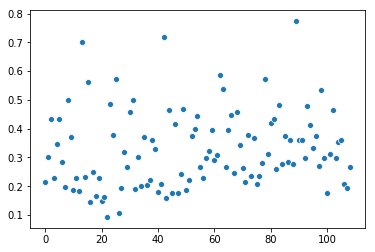

In [149]:
sns.scatterplot(y=weights_earphone, x=range(len(weights_earphone)))

In [156]:
np.mean(weights_earphone)

0.32679897695657967

# Build Model

In [101]:
tweets = pd.read_csv('~/Documents/datasets/0-5mb/twitter-airline-sentiment/Tweets.csv')
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [102]:
tweets.head()['airline_sentiment']

0     neutral
1    positive
2     neutral
3    negative
4    negative
Name: airline_sentiment, dtype: object

In [103]:
[t for t in tweets.head()['text']]

['@VirginAmerica What @dhepburn said.',
 "@VirginAmerica plus you've added commercials to the experience... tacky.",
 "@VirginAmerica I didn't today... Must mean I need to take another trip!",
 '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "@VirginAmerica and it's a really big bad thing about it"]

In [104]:
df = tweets[tweets.airline_sentiment != 'neutral'].loc[:8000, ['airline_sentiment', 'text']].copy()
df.shape

(6046, 2)

In [105]:
[t for t in df.tail(10)['text']]

['@JetBlue, why must you always delay my Late Flight night Orlando flights? 💔',
 '@JetBlue ...second incident of lost baggage.  I sent you a DM.  Thoughts?',
 "@JetBlue maybe announce the delay so we don't sit on the plane on the runway for an hour+ before taking off",
 '@JetBlue Please come to Indianapolis!',
 '@JetBlue flight 691 from bos to Tampa takeoff 40 min Late Flight',
 '.@JetBlue Ah grasshopper, your twitterz kung fu no good.  Hire geeks. http://t.co/8MWItRi9kF',
 "@JetBlue Did you discontinue nonstop service from SJC to BOS? Can't find 471 or 472 anywhere",
 '@JetBlue Noooo!! Why is our previously direct flight from FLL&gt;SFO diverted to LAS? Now arriving almost 2 hrs Late Flightr. 👎',
 'Well lets see.  You could pay for my Negroni with bitcoin. @JetBlue',
 '@JetBlue okay thanks. Hope to be flying with you guys soon!']

In [106]:
[t for t in df.tail(10)['airline_sentiment']]

['negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive']

In [107]:
vect = TfidfVectorizer(ngram_range=(1,2),
                       max_features=600,
                       token_pattern=r'\b[^\d\W][^\d\W]+\b',
                       stop_words=ENGLISH_STOP_WORDS)

In [108]:
x = vect.fit_transform(df.text)
X = pd.DataFrame(x.toarray(), columns=vect.get_feature_names())
X.head()

,able,account,actually,add,agent,agents,ago,air,aircraft,airline,...,worst airline,wouldn,wow,wrong,wtf,yall,year,years,yes,yesterday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.426725,0.0


In [109]:
y = df.airline_sentiment
y.tail()

7993    negative
7994    negative
7995    negative
7996    negative
7999    positive
Name: airline_sentiment, dtype: object

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [111]:
log_reg = LogisticRegression().fit(X_train, y_train)

/home/jassi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [112]:
log_reg.score(X_test, y_test)

0.8664021164021164

In [113]:
y_pred = log_reg.predict(X_test)

In [114]:
accuracy_score(y_test, y_pred)

0.8664021164021164

In [115]:
y_prob = log_reg.predict_proba(X_test)[:,1]

In [116]:
y_prob

array([0.22687888, 0.09638062, 0.18501693, ..., 0.39182773, 0.08607344,
       0.03471181])

In [117]:
confusion_matrix(y_test, y_pred)

array([[1108,   32],
       [ 170,  202]])

In [118]:
y_pred_th = ['positive' if prob>=0.25 else 'negative' for prob in y_prob]

In [119]:
confusion_matrix(y_test, y_pred_th)

array([[996, 144],
       [ 85, 287]])

In [120]:
accuracy_score(y_test, y_pred_th)

0.8485449735449735

# Now here I should improve accuracy without affecting CM proportions

In [121]:
scores_prob = []

def get_cm(p):
    y_pred_th = ['positive' if prob>=p else 'negative' for prob in y_prob]
    print('\n-----------')
    print(p)
    score = accuracy_score(y_test, y_pred_th)
    scores_prob.append(score)
    print(score)
    print(confusion_matrix(y_test, y_pred_th))

In [122]:
for prob in np.arange(0.1, 0.9, 0.1):
    get_cm(prob)


-----------
0.1
0.6527777777777778
[[637 503]
 [ 22 350]]

-----------
0.2
0.8253968253968254
[[938 202]
 [ 62 310]]

-----------
0.30000000000000004
0.8538359788359788
[[1031  109]
 [ 112  260]]

-----------
0.4
0.8630952380952381
[[1078   62]
 [ 145  227]]

-----------
0.5
0.8664021164021164
[[1108   32]
 [ 170  202]]

-----------
0.6
0.8571428571428571
[[1124   16]
 [ 200  172]]

-----------
0.7000000000000001
0.8359788359788359
[[1132    8]
 [ 240  132]]

-----------
0.8
0.8154761904761905
[[1134    6]
 [ 273   99]]


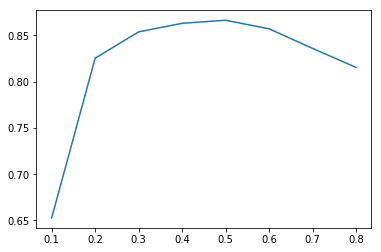

In [123]:
sns.lineplot(x=np.arange(0.1, 0.9, 0.1), y=scores_prob)

In [124]:
r = np.random.randint(0, len(y_test), 7)
print(list(y_test.iloc[r]))
print(list(y_pred[r]))

['negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative']
['negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive']


In [125]:
np.random.randint(1,4,5)

array([3, 1, 3, 1, 3])


## Regularization (penalisation) - find right value for C

In [126]:
def get_accuracy_score(C):
    log_reg = LogisticRegression(C=C).fit(X_train, y_train)
    return log_reg.score(X_test, y_test)

In [128]:
print('C = {}, score = {}'.format(1000, get_accuracy_score(1000)))
print('C = {}, score = {}'.format(0.001, get_accuracy_score(0.001)))

/home/jassi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jassi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C = 1000, score = 0.8465608465608465
C = 0.001, score = 0.753968253968254


In [68]:
C_values = np.arange(0.5, 2.5, 0.1)
C_values

array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4])

In [69]:
scores = []
for C in C_values:
    scores.append(get_accuracy_score(C))

/home/jassi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jassi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jassi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jassi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jassi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

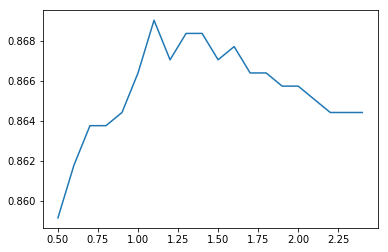

In [70]:
sns.lineplot(x=C_values, y=scores)


## Predict Probability Threshold

In [372]:
# Contruct data where one of the class is sparse

In [71]:
df.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [72]:
high_negative_df = df[df.airline_sentiment == 'negative'].copy()

In [73]:
len(high_negative_df)

4560

In [74]:
high_negative_df = high_negative_df.append(df[df.airline_sentiment == 'positive'].iloc[:45])

In [75]:
high_negative_df.tail()

,airline_sentiment,text
138,positive,@VirginAmerica always!!! Xoxo
141,positive,@VirginAmerica best customer service rep in th...
144,positive,@VirginAmerica you have amazing staff &amp; su...
147,positive,Always have it together!!! You're welcome! RT ...
148,positive,@virginamerica #flight home to #dc #sunset #gl...


In [76]:
# Data is Ready

In [77]:
vect = TfidfVectorizer(ngram_range=(1,2),
                       max_features=600,
                       token_pattern=r'\b[^\d\W][^\d\W]+\b',
                       stop_words=ENGLISH_STOP_WORDS)

In [78]:
x = vect.fit_transform(high_negative_df.text)
X = pd.DataFrame(x.toarray(), columns=vect.get_feature_names())
X.head()

,able,account,actually,add,agent,agents,ago,air,aircraft,airline,...,wouldn,wrong,wtf,yall,yeah,year,years,yes,yesterday,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
y = high_negative_df.airline_sentiment
y.tail()

138    positive
141    positive
144    positive
147    positive
148    positive
Name: airline_sentiment, dtype: object

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [81]:
log_reg = LogisticRegression(C=1.0).fit(X_train, y_train)

/home/jassi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
log_reg.score(X_test, y_test)

0.9913194444444444

In [83]:
y_pred = log_reg.predict(X_test)

In [84]:
accuracy_score(y_test, y_pred)

0.9913194444444444

In [85]:
y_prob = log_reg.predict_proba(X_test)[:,1]

In [86]:
y_prob

array([0.00449581, 0.0058315 , 0.00569825, ..., 0.00534925, 0.00683726,
       0.00549699])

In [90]:
confusion_matrix(y_test, y_pred)

array([[1141,    0],
       [  10,    1]])

In [91]:
y_pred_th = ['positive' if prob>=0.5 else 'negative' for prob in y_prob]

In [92]:
confusion_matrix(y_test, y_pred_th)

array([[1141,    0],
       [  10,    1]])

In [93]:
scores_prob = []

def get_cm(p):
    y_pred_th = ['positive' if prob>=p else 'negative' for prob in y_prob]
    print('\n-----------')
    print(p)
    score = accuracy_score(y_test, y_pred_th)
    scores_prob.append(score)
    print(score)
    print(confusion_matrix(y_test, y_pred_th))

In [94]:
for prob in np.arange(0.1, 0.9, 0.1):
    get_cm(prob)


-----------
0.1
0.9878472222222222
[[1132    9]
 [   5    6]]

-----------
0.2
0.9878472222222222
[[1135    6]
 [   8    3]]

-----------
0.30000000000000004
0.9904513888888888
[[1139    2]
 [   9    2]]

-----------
0.4
0.9913194444444444
[[1141    0]
 [  10    1]]

-----------
0.5
0.9913194444444444
[[1141    0]
 [  10    1]]

-----------
0.6
0.9904513888888888
[[1141    0]
 [  11    0]]

-----------
0.7000000000000001
0.9904513888888888
[[1141    0]
 [  11    0]]

-----------
0.8
0.9904513888888888
[[1141    0]
 [  11    0]]


## If we ignore the graph, we can see CM is best at threshold = 0.1
Infact, accuracy at 0.1 is not so bad. CM also looks good.

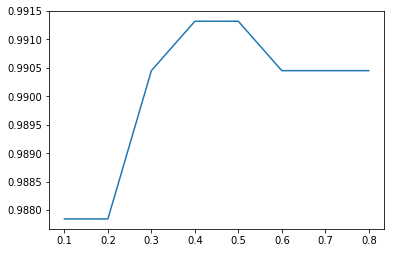

In [95]:
sns.lineplot(x=np.arange(0.1, 0.9, 0.1), y=scores_prob)

In [96]:
# Accuracy still good at 0.1 and 0.2

In [97]:
scores_prob = []
for prob in np.arange(0.01, 0.2, 0.02):
    get_cm(prob)


-----------
0.01
0.9088541666666666
[[1036  105]
 [   0   11]]

-----------
0.03
0.9652777777777778
[[1101   40]
 [   0   11]]

-----------
0.049999999999999996
0.9791666666666666
[[1117   24]
 [   0   11]]

-----------
0.06999999999999999
0.9835069444444444
[[1125   16]
 [   3    8]]

-----------
0.08999999999999998
0.9878472222222222
[[1132    9]
 [   5    6]]

-----------
0.10999999999999997
0.9878472222222222
[[1133    8]
 [   6    5]]

-----------
0.12999999999999998
0.9878472222222222
[[1134    7]
 [   7    4]]

-----------
0.15
0.9878472222222222
[[1134    7]
 [   7    4]]

-----------
0.16999999999999998
0.9878472222222222
[[1134    7]
 [   7    4]]

-----------
0.18999999999999997
0.9878472222222222
[[1135    6]
 [   8    3]]


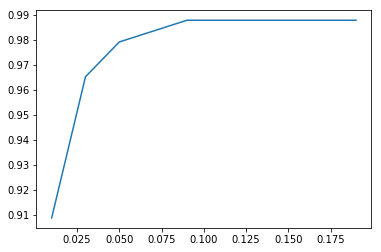

In [98]:
sns.lineplot(x=np.arange(0.01, 0.2, 0.02), y=scores_prob)

In [100]:
# we can observe threshold between 0.05 and 0.07 give the best result, with an okay accuracy score of 98%